In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

raw = pd.read_csv('./healthcare/train_data.csv')
raw = raw.dropna()
raw.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [2]:
raw.shape

(313793, 18)

In [3]:
train, test = train_test_split(raw, test_size=0.05)

In [4]:
train.shape

(298103, 18)

In [5]:
test.shape

(15690, 18)

In [8]:
from pycaret.classification import *

clf1 = setup(
    train, 
    target = 'Stay',
    session_id=1945,
    # normalize = True, 
    # transform_target = True, 
    ignore_features = ['case_id', 'patientid', 'Visitors with Patient'],
    # polynomial_features = True, 
    # feature_selection = True, 
    # train_size=0.8,
    categorical_features = ['Hospital_code', 'Bed Grade', 'City_Code_Patient'],
    log_experiment=True,
    log_plots=True,
    log_profile = True,
    use_gpu=True,
    experiment_name='jb-ex-healthcare-v02'
)

,Description,Value
0,session_id,1945
1,Target Type,Multiclass
2,Label Encoded,"0-10: 0, 11-20: 1, 21-30: 2, 31-40: 3, 41-50: 4, 51-60: 5, 61-70: 6, 71-80: 7, 81-90: 8, 91-100: 9, More than 100 Days: 10"
3,Original Data,"(298103, 18)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
best = compare_models(fold = 5, exclude = ['svm', 'qda', 'gbc', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.3419,0.0000,0.1476,0.2947,0.2974,0.1431,0.1483,55.4985
1,Light Gradient Boosting Machine,0.3407,0.0000,0.1461,0.2896,0.2920,0.1399,0.1460,2.9573
2,Linear Discriminant Analysis,0.3283,0.0000,0.1334,0.2706,0.2670,0.1162,0.1239,1.7892
3,Ridge Classifier,0.3281,0.0000,0.1203,0.2605,0.2513,0.1017,0.1119,0.1747
4,Ada Boost Classifier,0.3274,0.0000,0.1332,0.2648,0.2644,0.1142,0.1224,5.1100
5,Logistic Regression,0.3141,0.0000,0.1136,0.2295,0.2401,0.0820,0.0896,3.9473
6,Random Forest Classifier,0.2748,0.0000,0.1279,0.2459,0.2546,0.0765,0.0774,0.6178
7,Extra Trees Classifier,0.2726,0.0000,0.1327,0.2470,0.2558,0.0779,0.0785,7.1362
8,K Neighbors Classifier,0.2473,0.0000,0.1063,0.2146,0.2225,0.0370,0.0377,2.5957
9,Decision Tree Classifier,0.2342,0.0000,0.1268,0.2334,0.2338,0.0577,0.0577,1.2126


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x00000276802D1EC8>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


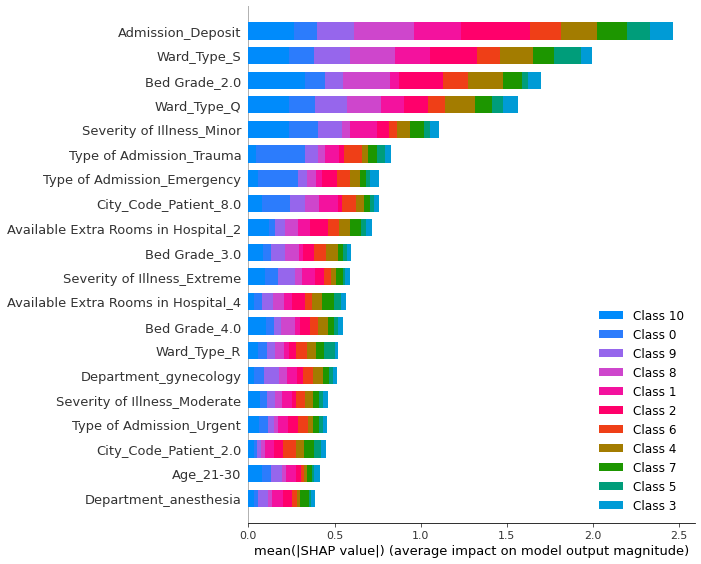

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [19]:
interpret_model(best)

In [20]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3390,0.0000,0.1429,0.2886,0.2909,0.1382,0.1444
1,0.3412,0.0000,0.1487,0.2903,0.2920,0.1402,0.1465
2,0.3454,0.0000,0.1450,0.2912,0.2950,0.1449,0.1514
3,0.3498,0.0000,0.1479,0.2958,0.2992,0.1520,0.1586
4,0.3391,0.0000,0.1440,0.2858,0.2894,0.1377,0.1439
5,0.3414,0.0000,0.1479,0.2920,0.2937,0.1408,0.1468
6,0.3420,0.0000,0.1447,0.2911,0.2939,0.1425,0.1485
7,0.3462,0.0000,0.1517,0.3053,0.2962,0.1464,0.1533
8,0.3433,0.0000,0.1443,0.2861,0.2912,0.1415,0.1483
9,0.3391,0.0000,0.1486,0.3035,0.2922,0.1368,0.1429


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1945, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


<Figure size 576x396 with 0 Axes>

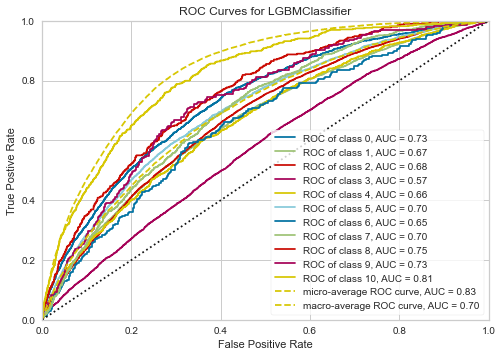

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(lightgbm)

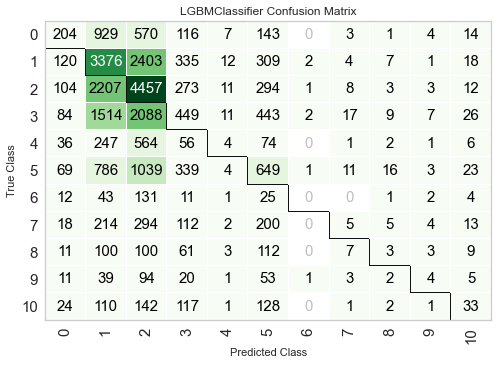

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(lightgbm, plot='confusion_matrix')

In [25]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1945, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


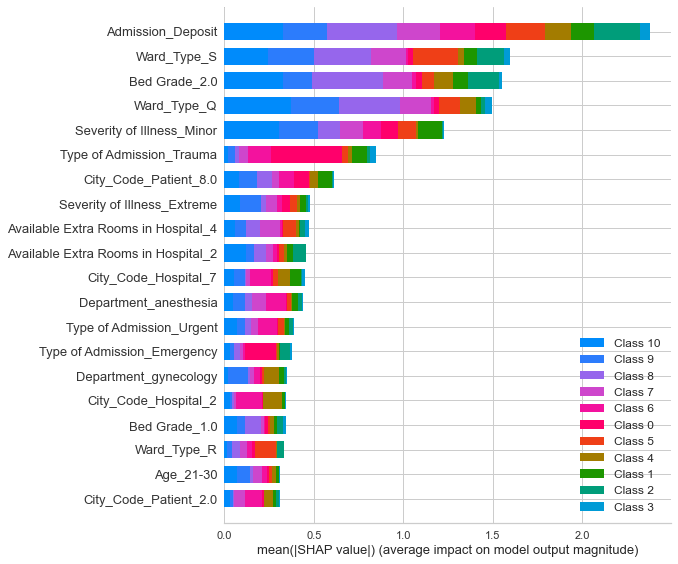

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [24]:
interpret_model(lightgbm)

In [26]:
tunned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3395,0.0000,0.1361,0.2765,0.2806,0.1322,0.1398
1,0.3438,0.0000,0.1411,0.2785,0.2848,0.1371,0.1453
2,0.3454,0.0000,0.1404,0.2821,0.2863,0.1393,0.1475
3,0.3479,0.0000,0.1412,0.2796,0.2881,0.1439,0.1521
4,0.3442,0.0000,0.1390,0.2776,0.2832,0.1375,0.1459
5,0.3387,0.0000,0.1390,0.3065,0.2801,0.1303,0.1380
6,0.3411,0.0000,0.1386,0.2830,0.2820,0.1340,0.1420
7,0.3415,0.0000,0.1438,0.3301,0.2824,0.1351,0.1430
8,0.3430,0.0000,0.1365,0.2783,0.2805,0.1343,0.1432
9,0.3380,0.0000,0.1396,0.2823,0.2805,0.1285,0.1366


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=100,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=70, n_jobs=-1, num_leaves=10, objective=None,
               random_state=1945, reg_alpha=0.4, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


<Figure size 576x396 with 0 Axes>

In [27]:
ensembled_lightgbm = ensemble_model(tunned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3412,0.0000,0.1380,0.2791,0.2799,0.1334,0.1418
1,0.3476,0.0000,0.1411,0.2831,0.2870,0.1411,0.1499
2,0.3476,0.0000,0.1405,0.2876,0.2863,0.1409,0.1499
3,0.3446,0.0000,0.1375,0.2747,0.2822,0.1378,0.1464
4,0.3436,0.0000,0.1386,0.2792,0.2818,0.1360,0.1445
5,0.3446,0.0000,0.1426,0.3126,0.2829,0.1373,0.1461
6,0.3419,0.0000,0.1380,0.2806,0.2795,0.1340,0.1426
7,0.3442,0.0000,0.1427,0.2866,0.2831,0.1373,0.1460
8,0.3415,0.0000,0.1356,0.2781,0.2770,0.1316,0.1407
9,0.3337,0.0000,0.1345,0.2750,0.2725,0.1212,0.1294


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1,
                                                max_depth=100,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0,
                                                n_estimators=70, n_jobs=-1,
                                                num_leaves=10, objective=None,
                                                random_state=1945,
                                               

<Figure size 576x396 with 0 Axes>

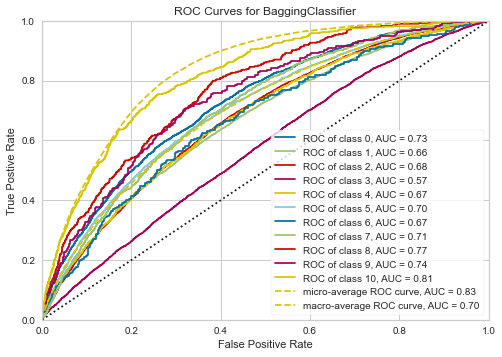

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(ensembled_lightgbm)

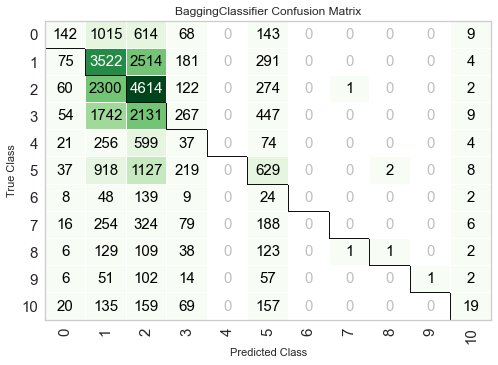

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(ensembled_lightgbm, plot='confusion_matrix')

In [31]:
evaluate_model(ensembled_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
predict_model(ensembled_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.3427,0,0.1404,0.2993,0.282,0.1346,0.1433


,Admission_Deposit,Hospital_code_1.0,Hospital_code_10.0,Hospital_code_11.0,Hospital_code_12.0,Hospital_code_13.0,Hospital_code_14.0,Hospital_code_15.0,Hospital_code_16.0,Hospital_code_17.0,...,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay,Label,Score
0,4851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31-40,11-20,0.3818
1,3388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21-30,11-20,0.3577
2,3814.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,More than 100 Days,51-60,0.2900
3,4697.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21-30,21-30,0.4690
4,4835.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21-30,21-30,0.4818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26825,3273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,21-30,21-30,0.2114
26826,7487.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21-30,11-20,0.3183
26827,5688.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51-60,11-20,0.2589
26828,4834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21-30,21-30,0.5396


In [54]:
predict_test = predict_model(ensembled_lightgbm, test)
predict_test.to_csv('predict_test.csv', index=False)
predict_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Label,Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4042
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3318
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2994
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4797
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318288,318289.0,29.0,a,4.0,X,4.0,gynecology,S,F,4.0,47755.0,12.0,Urgent,Moderate,3.0,11-20,4353.0,21-30,11-20,NaN
318320,318321.0,12.0,a,9.0,Y,5.0,gynecology,Q,B,2.0,131259.0,12.0,Emergency,Minor,4.0,11-20,5578.0,0-10,11-20,NaN
318375,318376.0,1.0,d,10.0,Y,6.0,gynecology,R,B,3.0,93015.0,7.0,Emergency,Extreme,3.0,91-100,4399.0,21-30,11-20,NaN
318395,318396.0,27.0,a,7.0,Y,3.0,gynecology,R,C,4.0,67410.0,30.0,Urgent,Minor,3.0,11-20,4614.0,11-20,11-20,NaN


In [55]:
submit = pd.read_csv('./healthcare/test_data.csv')
predict_submit = predict_model(ensembled_lightgbm, submit)

In [56]:
predict_submit

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Label,Score
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,0-10,0.3135
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,51-60,0.2208
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,0-10,0.2919
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,21-30,0.4573
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,21-30,0.3071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,11-20,0.3275
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0-10,0.3308
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,11-20,0.4735
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,11-20,0.5870


In [57]:
predict_submit_format = pd.DataFrame({ 'case_id': predict_submit['case_id'], 'Stay': predict_submit['Label']})
predict_submit_format.to_csv('Submission.csv', index=False)
predict_submit_format

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,0-10
3,318442,21-30
4,318443,21-30
...,...,...
137052,455491,11-20
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20
